In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:

import matplotlib.pyplot as plt
import numpy as np
from expertawrapper import *


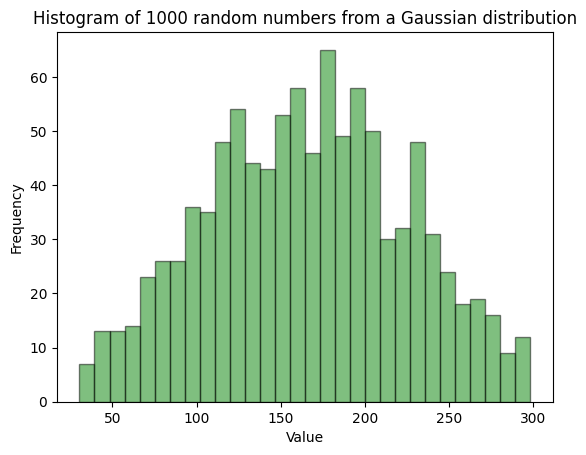

In [3]:
# Test the generator

u = Utils()
random_numbers = [u.gaussian(30, 300) for _ in range(1000)]
plt.hist(random_numbers, bins=30, alpha=0.5, color='g', edgecolor='black')
plt.title('Histogram of 1000 random numbers from a Gaussian distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [4]:
# Initialize the global variables

successful_tests = 0


In [5]:
# Initialize the knowledge engines

suspicion_engine = SuspicionInvestigation()
tumor_engine = TumorStage()
nodes_engine = NodesStage()
metastasis_engine = MetastasisStage()
cancer_engine = CancerStage()


In [6]:
# Define testing methods

def test_case(engine, fact, expected, fact_type):
    """
    Test a single case for a given engine.
    
    Arguments:
        engine: KnowledgeEngine instance to test.
        fact: Fact instance to assert.
        expected: Expected output from the engine.
        fact_type: The type of fact.
    """
    # Initialize and reset the engine.
    engine.reset()
    # Assert the fact to the engine.
    engine.declare(fact_type(**fact))
    # Run the engine.
    engine.run()
    
    # Compare the expected and actual outputs.
    try:
        result = engine.get_result()
        assert expected == result, f"Expected: {expected}, but got: {result}"
        global successful_tests
        successful_tests += 1  # Increment the counter if the assertion passed
    except AssertionError as e:
        print(f"Test failed: {e}")

def run_tests(engine, cases, fact_type):
    """
    Run all test cases for a given engine.
    
    Arguments:
        engine: KnowledgeEngine instance to test.
        cases: List of cases to test. Each case is a tuple of a fact and an expected output.
        fact_type: The type of fact.
    """
    for fact, expected in cases:
        test_case(engine, fact, expected, fact_type)


In [7]:
# Test cases for the suspicion engine.
suspicion_cases = [
    ({'smoking':False, 'asbestos':False, 'radio':False, 
      'history':False, 'tsymptoms':False, 'nsymptoms':False, 'msymptoms':False}, 'False'),
    ({'smoking':True, 'asbestos':False, 'radio':False, 
      'history':False, 'tsymptoms':False, 'nsymptoms':False, 'msymptoms':False}, 'True'),
    ({'smoking':False, 'asbestos':True, 'radio':False, 
      'history':False, 'tsymptoms':False, 'nsymptoms':False, 'msymptoms':False}, 'True')
]

# Test cases for the tumor engine.
tumor_cases = [
    ({"mass": False, "diameter": 0.0, "bronchoscopesis": False, 
      "cytologic": False, "nearby_organs": False, "fna_and_pet_scan": False}, "T0"),
    ({"mass": False, "diameter": 0.0, "bronchoscopesis": False, 
      "cytologic": True, "nearby_organs": False, "fna_and_pet_scan": False}, "Tx"),
    ({"mass": True, "diameter": 1.8, "bronchoscopesis": False, 
      "cytologic": True, "nearby_organs": False, "fna_and_pet_scan": True}, "T1a"),
    ({"mass": True, "diameter": 2.5, "bronchoscopesis": False, 
      "cytologic": True, "nearby_organs": False, "fna_and_pet_scan": True}, "T1b"),
    ({"mass": True, "diameter": 3.1, "bronchoscopesis": False, 
      "cytologic": True, "nearby_organs": False, "fna_and_pet_scan": True}, "T2a"),
    ({"mass": True, "diameter": 5.3, "bronchoscopesis": False, 
      "cytologic": True, "nearby_organs": False, "fna_and_pet_scan": True}, "T2b"),   
    ({"mass": True, "diameter": 7.8, "bronchoscopesis": False, 
      "cytologic": True, "nearby_organs": False, "fna_and_pet_scan": False}, "T3"),
    ({"mass": True, "diameter": 4.1, "bronchoscopesis": False, 
      "cytologic": False, "nearby_organs": True, "fna_and_pet_scan": False}, "T4"),   
    ({'mass': True, 'diameter': 4.73, 'bronchoscopesis': False, 
      'cytologic': False, 'nearby_organs': True, 'fna_and_pet_scan': True}, "T4")
]

# Test cases for the nodes engine.
nodes_cases = [
    ({"lymph_nodes_size": 0.4, "peribronchial_metastasis": False, 
      "mediastinal_metastasis": False, "fna_positive": False}, "N0"),
    ({"lymph_nodes_size": 1.0, "peribronchial_metastasis": False, 
      "mediastinal_metastasis": False, "fna_positive": False}, "Nx"),
    ({"lymph_nodes_size": 1.6, "peribronchial_metastasis": True, 
      "mediastinal_metastasis": False, "fna_positive": False}, "N1"),
    ({"lymph_nodes_size": 1.7, "peribronchial_metastasis": False, 
      "mediastinal_metastasis": True, "fna_positive": False}, "N2"),
    ({"lymph_nodes_size": 0.7, "peribronchial_metastasis": False, 
      "mediastinal_metastasis": False, "fna_positive": True}, "N3"),
]

# Test cases for the metastasis engine.
metastasis_cases = [
    ({"separate_tumor_nodules": False, "distant_metastasis": False}, "M0"),
    ({"separate_tumor_nodules": True, "distant_metastasis": False}, "M1a"),
    ({"separate_tumor_nodules": False, "distant_metastasis": True}, "M1b"),
]

# Test cases for the cancer engine.
cancer_cases = [
    ({"T": "Tx", "N": "N0", "M": "M0"}, "Stage Undetermined"),
    ({"T": "T1a", "N": "Nx", "M": "M0"}, "Stage Undetermined"),
    ({"T": "T1a", "N": "N0", "M": "Mx"}, "Stage Undetermined"),
    ({"T": "T1a", "N": "N0", "M": "M0"}, "Stage IA2"),
    ({"T": "T1b", "N": "N0", "M": "M0"}, "Stage IA3"),
    ({"T": "T1c", "N": "N0", "M": "M0"}, "Stage IB"),
    ({"T": "T2a", "N": "N0", "M": "M0"}, "Stage IB"),
    ({"T": "T2b", "N": "N0", "M": "M0"}, "Stage IIA"),
    ({"T": "T3", "N": "N0", "M": "M0"}, "Stage IIA"),
    ({"T": "T1", "N": "N1", "M": "M0"}, "Stage IIB"),
    ({"T": "T2", "N": "N1", "M": "M0"}, "Stage IIB"),
    ({"T": "T1", "N": "N2", "M": "M0"}, "Stage IIIA"),
    ({"T": "T2", "N": "N2", "M": "M0"}, "Stage IIIA"),
    ({"T": "T3", "N": "N1", "M": "M0"}, "Stage IIIA"),
    ({"T": "T3", "N": "N2", "M": "M0"}, "Stage IIIA"),
    ({"T": "T4", "N": "N1", "M": "M0"}, "Stage IIIA"),
    ({"T": "T4", "N": "N2", "M": "M0"}, "Stage IIIA"),
    ({"T": "T1", "N": "N3", "M": "M0"}, "Stage IIIB"),
    ({"T": "T2", "N": "N3", "M": "M0"}, "Stage IIIB"),
    ({"T": "T3", "N": "N3", "M": "M0"}, "Stage IIIB"),
    ({"T": "T1", "N": "N1", "M": "M1a"}, "Stage IIIC"),
    ({"T": "T1", "N": "N2", "M": "M1a"}, "Stage IIIC"),
    ({"T": "T4", "N": "N3", "M": "M1a"}, "Stage IIIC"),
    ({"T": "T1", "N": "N2", "M": "M1b"}, "Stage IV"),
    ({"T": "T2", "N": "N2", "M": "M1b"}, "Stage IV"),
    ({"T": "T3", "N": "N2", "M": "M1b"}, "Stage IV"),
    ({"T": "T3", "N": "N3", "M": "M1b"}, "Stage IV"),
    ({"T": "T4", "N": "N3", "M": "M1b"}, "Stage IV"),
    ({"T": "T1", "N": "N2", "M": "M1c"}, "Stage IV"),
    ({"T": "T2", "N": "N2", "M": "M1c"}, "Stage IV"),
    ({"T": "T3", "N": "N2", "M": "M1c"}, "Stage IV"),
    ({"T": "T3", "N": "N3", "M": "M1c"}, "Stage IV"),
    ({"T": "T4", "N": "N3", "M": "M1c"}, "Stage IV")
]


In [8]:
# Run the tests

run_tests(suspicion_engine, suspicion_cases, SUSPICION_FACTS)
run_tests(tumor_engine, tumor_cases, TUMOR_FACTS)
run_tests(nodes_engine, nodes_cases, NODES_FACTS)
run_tests(metastasis_engine, metastasis_cases, METASTASIS_FACTS)
run_tests(cancer_engine, cancer_cases, TNM_FACTS)

print('Total successful test cases: ', successful_tests)


Total successful test cases:  53
